In [1]:
import pandas as pd 
import numpy as np


In [2]:
import folium


In [3]:
metro_data = pd.read_csv("Delhi-Metro-Network.csv")

metro_data.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


 # Null VAlues Check 

In [5]:
# checking for missing values
missing_values = metro_data.isnull().sum()

# checking data types
data_types = metro_data.dtypes

missing_values

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [6]:
data_types

Station ID                    int64
Station Name                 object
Distance from Start (km)    float64
Line                         object
Opening Date                 object
Station Layout               object
Latitude                    float64
Longitude                   float64
dtype: object

Now, I’ll convert the Opening Date column to a datetime format for ease of analysis:

In [8]:
metro_data['Opening  Date']=pd.to_datetime(metro_data['Opening Date'])

In [9]:

metro_data['Opening  Date']

0     2008-04-06
1     2018-10-31
2     2013-11-14
3     2017-12-25
4     2005-12-30
         ...    
280   2015-06-09
281   2006-01-04
282   2009-12-11
283   2019-01-25
284   2009-12-11
Name: Opening  Date, Length: 285, dtype: datetime64[ns]

 ## Geospatial Analysis

  I’ll start by visualizing the locations of the metro stations on a map. It will give us an insight into the geographical distribution of the stations across Delhi. We will use the latitude and longitude data to plot each station.

In [11]:
import folium

# Define a color scheme for the metro lines
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

# Create the map
delhi_map = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# Add markers for metro stations
for _, row in metro_data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=f"{row['Station Name']}, {row['Line']}",
        icon=folium.Icon(color=line_colors.get(row['Line'], 'black'))  # Default color is black
    ).add_to(delhi_map)

# Display the map
delhi_map


Densely Connected Central Area:

Central Delhi appears to have the densest network of metro lines, indicating it is a major hub for commuting.
Peripheral Coverage:

The network extends outward to areas like Ghaziabad, Noida, and Gurgaon. This highlights the Delhi Metro's role in inter-city connectivity within the NCR (National Capital Region).
Multiple Lines Intersect:

Several stations in central areas act as interchange hubs, where multiple lines converge. These are likely critical points for managing high passenger traffic.
Color-Coded Lines:

Each metro line has a unique color, making it easier to distinguish and analyze different routes and their coverage.
Connectivity to Key Areas:

The metro system connects major residential, commercial, and industrial zones, as well as transportation hubs like the Indira Gandhi International Airport.
Linear Extensions:

Lines extending to the periphery (e.g., Noida and Faridabad) suggest the metro prioritizes connecting suburban areas with the city center.

## Temporal Analysis
 I will analyze the growth of the Delhi Metro network over time. I’ll look at how many stations were opened each year and visualize this growth. It can provide insights into the pace of metro network expansion and its development phases

In [14]:
# Convert 'Opening Date' column to datetime format
metro_data['Opening Date'] = pd.to_datetime(metro_data['Opening Date'])

# Extract the year and create a new 'Opening Year' column
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


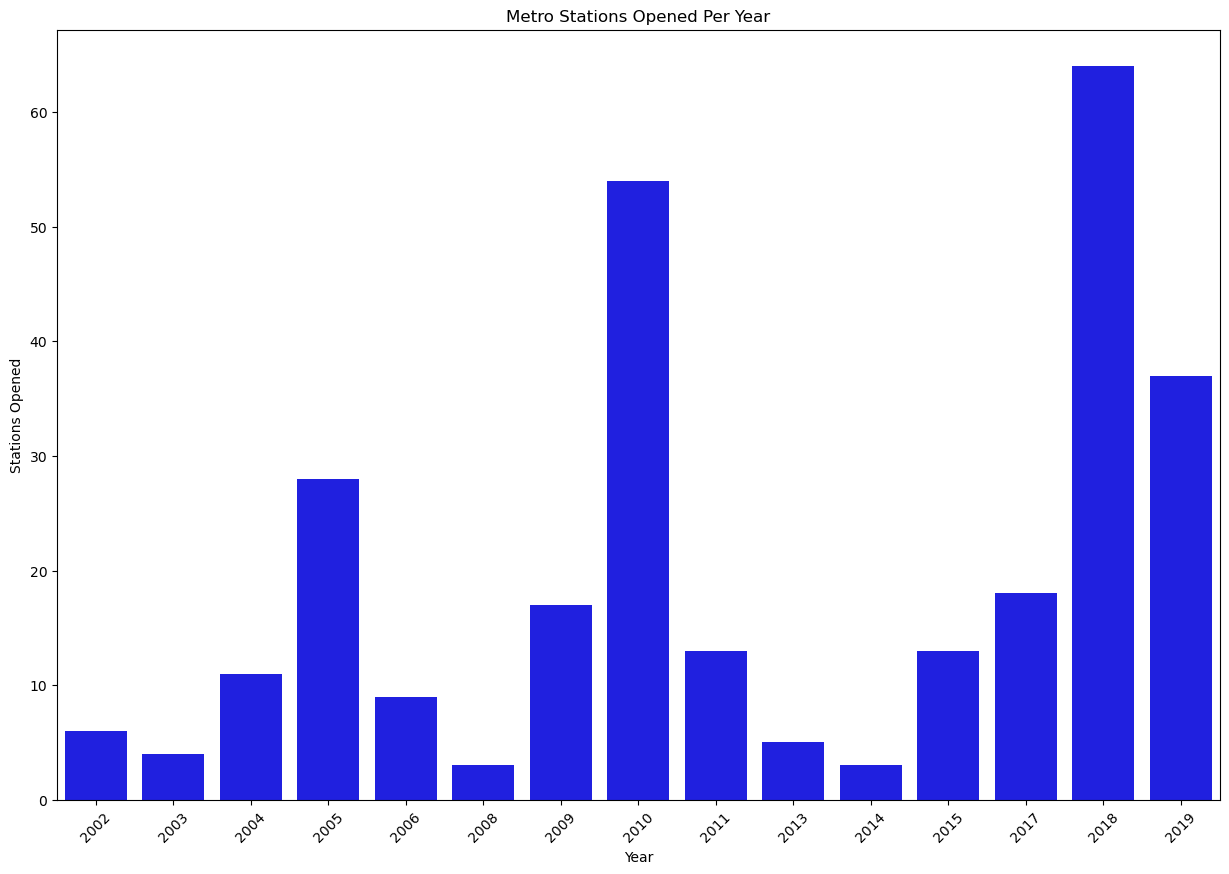

In [19]:
 
plt.figure(figsize=(15,10))
metro_data['Opening Year'] = metro_data['Opening Date'].dt.year
stations_per_year = metro_data['Opening Year'].value_counts().sort_index()

sns.barplot(x = stations_per_year.index ,y= stations_per_year.values,color= 'blue' )

plt.xlabel("Year")
plt.ylabel("Stations Opened")
plt.title("Metro Stations Opened Per Year")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Some years show a significant number of new station openings, indicating phases of rapid network expansion.

Conversely, there are years with few or no new stations, which could be due to various factors 
like planning, funding, or construction challenges.

Peak Year (2018): The year 2018 saw the highest number of metro stations opened, with over 60 stations. This indicates a significant expansion in that year.

High Activity (2010): The year 2010 also had a notable number of metro stations opened, with over 50 stations, marking another period of significant growth.

In [ ]:
stations_per_year

## Line Analysis

 I’ll analyze the various metro lines in terms of the number of stations they have and the average distance between stations. It will give us insights into the characteristics of each metro line, such as which lines are more extensive or denser.

In [21]:
stations_per_line = metro_data['Line'].value_counts()

# calculating the total distance of each metro line (max distance from start)
total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].max()

avg_distance_per_line = total_distance_per_line / (stations_per_line - 1)

line_analysis = pd.DataFrame({
    'Line': stations_per_line.index,
    'Number of Stations': stations_per_line.values,
    'Average Distance Between Stations (km)': avg_distance_per_line
})

# sorting the DataFrame by the number of stations
line_analysis = line_analysis.sort_values(by='Number of Stations', ascending=False)

line_analysis.reset_index(drop=True, inplace=True)
print(line_analysis)

                 Line  Number of Stations  \
0           Blue line                  49   
1           Pink line                  38   
2         Yellow line                  37   
3         Voilet line                  34   
4            Red line                  29   
5        Magenta line                  25   
6           Aqua line                  21   
7          Green line                  21   
8         Rapid Metro                  11   
9    Blue line branch                   8   
10        Orange line                   6   
11          Gray line                   3   
12  Green line branch                   3   

    Average Distance Between Stations (km)  
0                                 1.355000  
1                                 1.097917  
2                                 1.157143  
3                                 1.950000  
4                                 1.240000  
5                                 1.050000  
6                                 1.379167  
7        

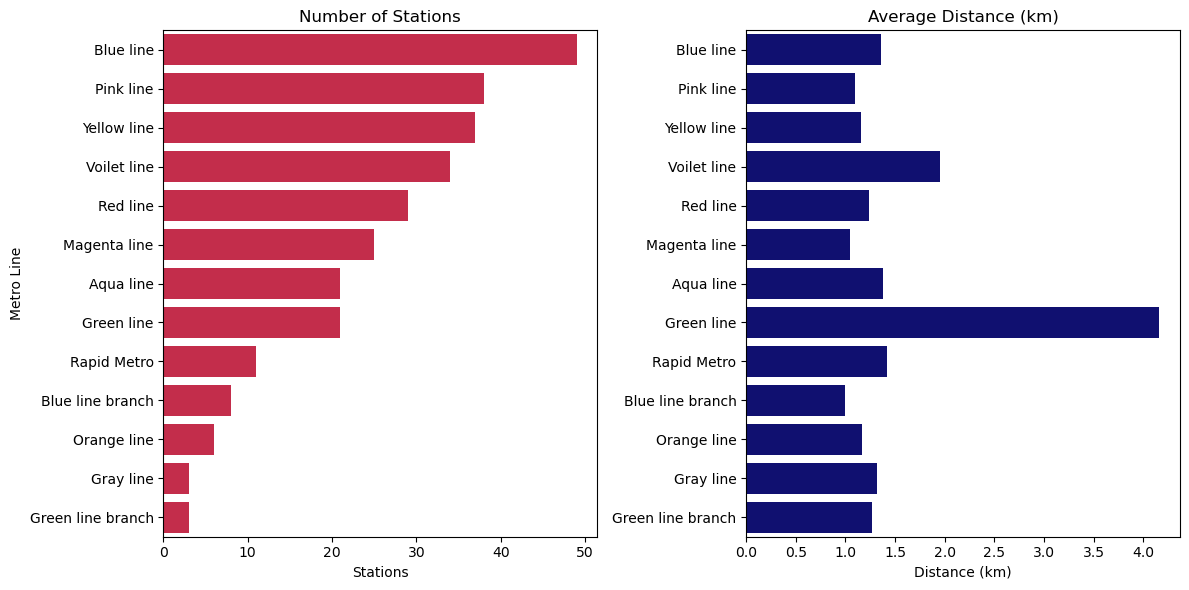

In [23]:


# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Number of Stations per Metro Line
sns.barplot(y='Line', x='Number of Stations', data=line_analysis, ax=axes[0], color='crimson')
axes[0].set_title("Number of Stations")
axes[0].set_xlabel("Stations")
axes[0].set_ylabel("Metro Line")

# Plot Average Distance Between Stations
sns.barplot(y='Line', x='Average Distance Between Stations (km)', data=line_analysis, ax=axes[1], color='navy')
axes[1].set_title("Average Distance (km)")
axes[1].set_xlabel("Distance (km)")
axes[1].set_ylabel("")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


Highest Number of Stations: The Blue line has the most stations, followed by the Pink and Yellow lines.

Longest Average Distance: The Green line has the longest average distance between stations, followed by the Rapid Metro and Aqua line.

Shortest Average Distance: The Blue line has the shortest average distance between stations.

Varied Station Numbers: The number of stations varies significantly among metro lines, reflecting different development stages and coverage areas.

## Station Layout Analysis
’ll explore the station layouts (Elevated, Ground Level, Underground). I’ll analyze the distribution of these layouts across the network and see if there are any patterns or trends, such as certain lines favouring a particular layout.

I’ll calculate the frequency of each layout type and then visualize these frequencies to get a clearer picture of the layout distribution. 

C:\Users\91952\AppData\Local\Temp\ipykernel_20328\3496910171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=layout_counts.index, y=layout_counts.values, palette='pastel')


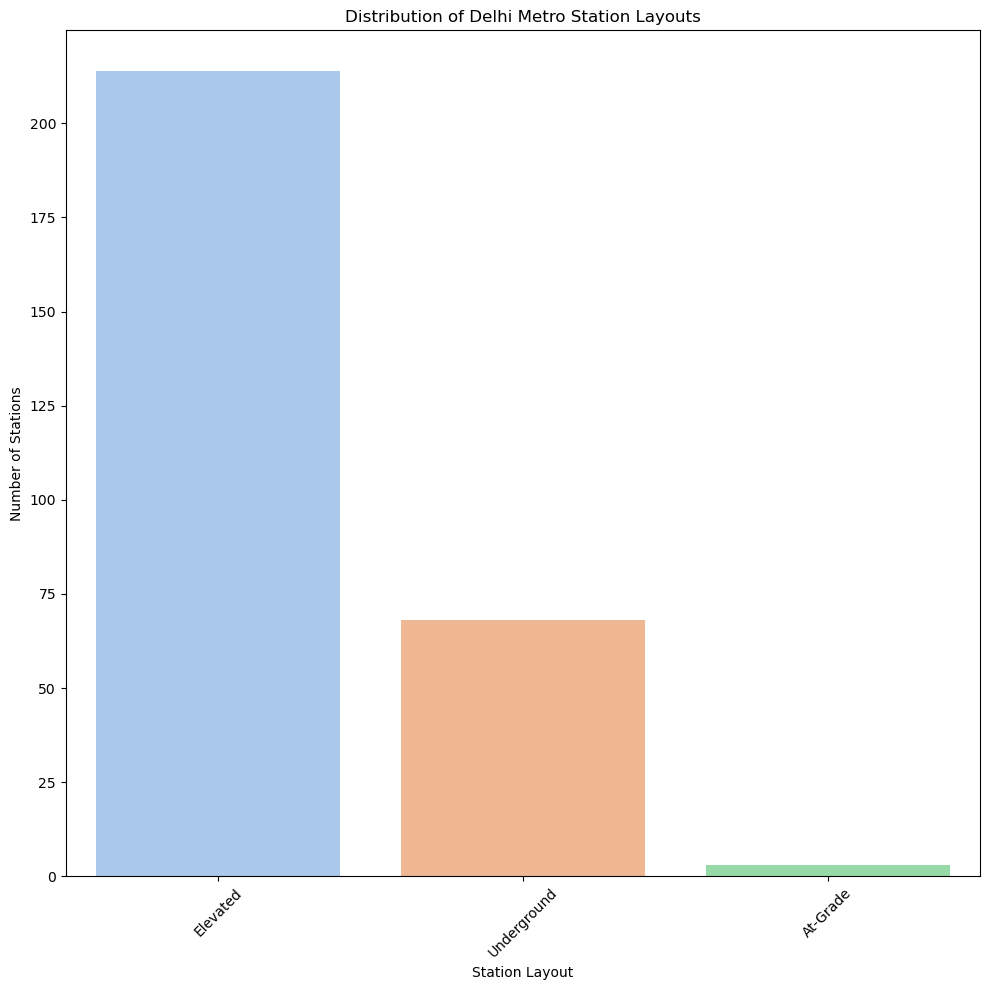

In [25]:
plt.figure(figsize=(10,10))
layout_counts = metro_data['Station Layout'].value_counts()
# Create a bar plot
sns.barplot(x=layout_counts.index, y=layout_counts.values, palette='pastel')

# Add labels and title
plt.title("Distribution of Delhi Metro Station Layouts")
plt.xlabel("Station Layout")
plt.ylabel("Number of Stations")

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Observations:
1) Elevated Stations: The majority of the stations are Elevated. It is a common design choice in urban areas to save space and reduce land acquisition issues.

    
2)Underground Stations: The Underground stations are fewer compared to elevated ones. These are likely in densely populated or central areas where above-ground construction is less feasible.

    
3) At-Grade Stations: There are only a few At-Grade (ground level) stations, suggesting they are less common in the network, possibly due to land and traffic considerations.

# # What Trends Can You Observe in Metro Station Development?

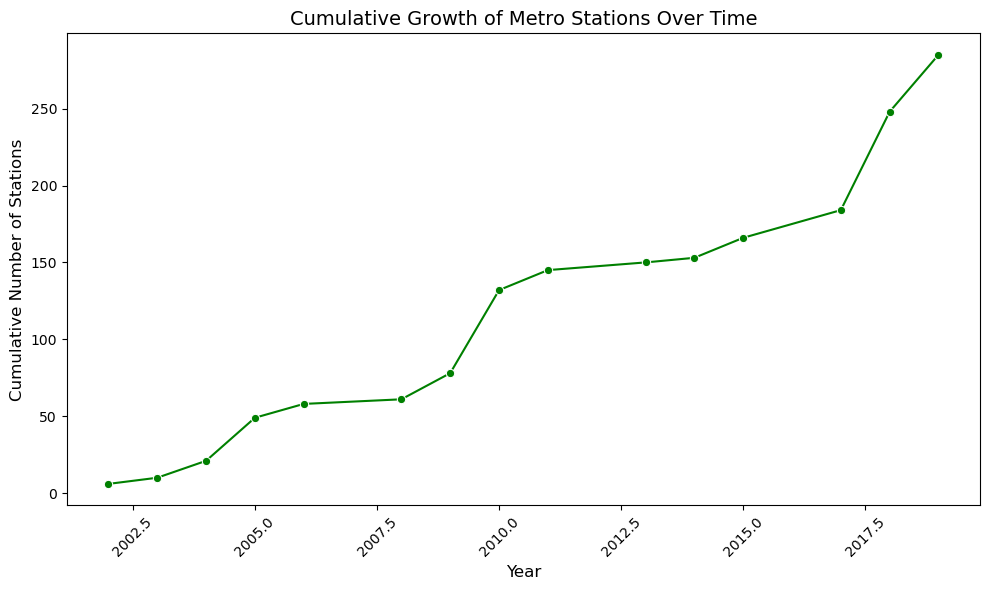

In [27]:
# Calculate cumulative stations opened over time
cumulative_stations = stations_per_year.cumsum()

# Plot the cumulative growth
plt.figure(figsize=(10, 6))
sns.lineplot(x=cumulative_stations.index, y=cumulative_stations.values, marker="o", color="green")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative Number of Stations", fontsize=12)
plt.title("Cumulative Growth of Metro Stations Over Time", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Steady Growth: The number of metro stations has steadily increased from 2002 to 2018, indicating continuous development in metro infrastructure.

Significant Expansion in 2010 and 2017: There were notable periods of rapid growth around the years 2010 and 2017, where the number of stations saw substantial increases.

Milestone Achievement: By 2018, the cumulative number of metro stations approached 250, showcasing a major milestone in the metro network expansion.

Consistent Infrastructure Development: The overall trend reflects a strong commitment to expanding metro services over a 15-year period, highlighting the importance of public transportation investments.

#   Comparative Analysis

How do Elevated and Underground Stations Compare in Terms of Distance from the Start?

C:\Users\91952\AppData\Local\Temp\ipykernel_20328\1154443782.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metro_data, x='Station Layout', y='Distance from Start (km)', palette='Set2')


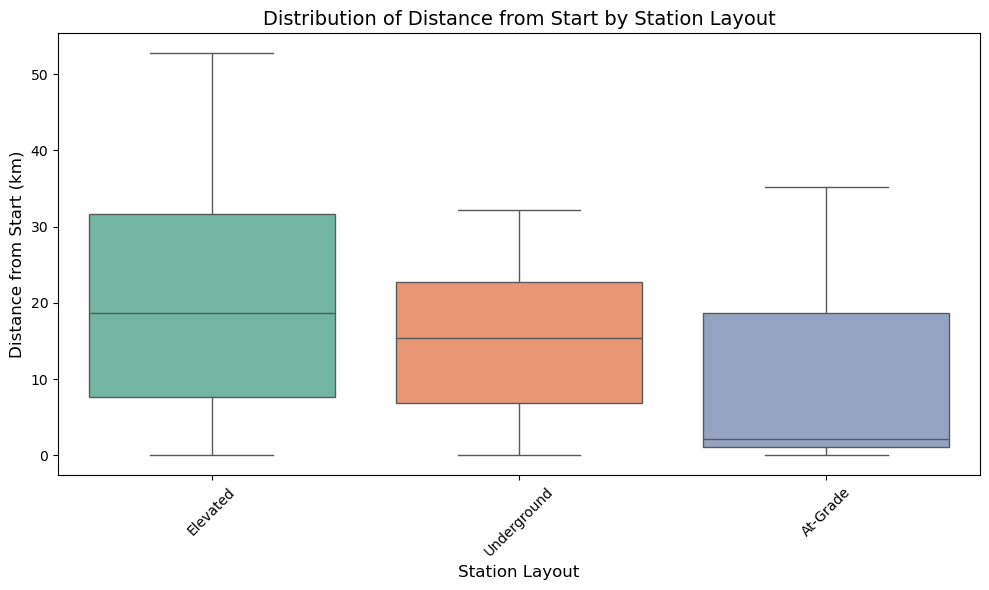

In [29]:


# Box plot: Distribution of "Distance from Start" for elevated vs. underground stations
plt.figure(figsize=(10, 6))
sns.boxplot(data=metro_data, x='Station Layout', y='Distance from Start (km)', palette='Set2')
plt.title("Distribution of Distance from Start by Station Layout", fontsize=14)
plt.xlabel("Station Layout", fontsize=12)
plt.ylabel("Distance from Start (km)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Are Newer Stations Distributed Differently Compared to Older Ones?

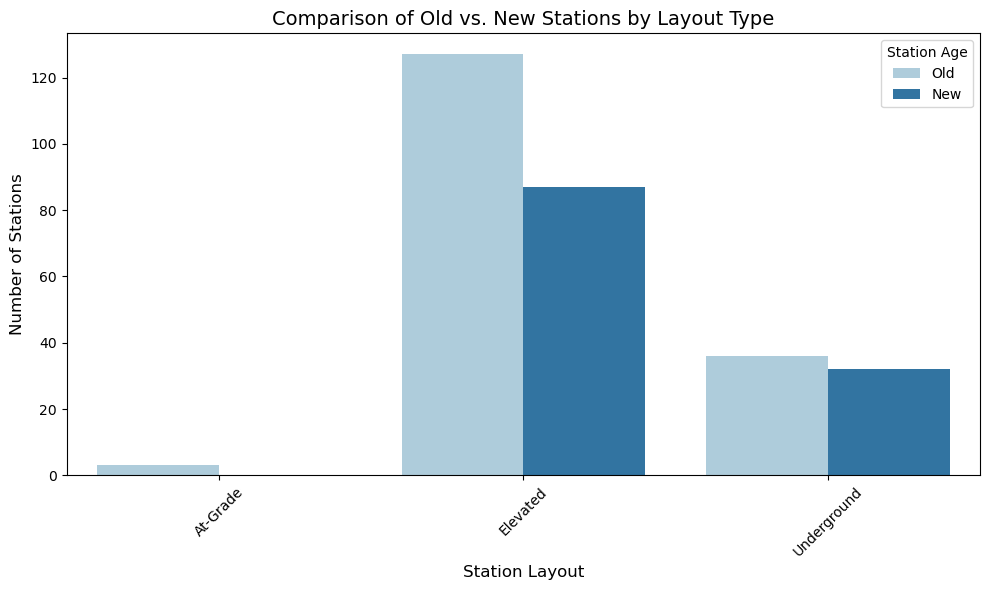

In [31]:
# Define a threshold year to separate old and new stations
threshold_year = 2015
metro_data['Station Age'] = metro_data['Opening Year'].apply(lambda x: 'Old' if x <= threshold_year else 'New')

# Count stations by layout and age
layout_age_counts = metro_data.groupby(['Station Layout', 'Station Age']).size().reset_index(name='Count')

# Side-by-Side Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=layout_age_counts, x='Station Layout', y='Count', hue='Station Age', palette='Paired')
plt.title("Comparison of Old vs. New Stations by Layout Type", fontsize=14)
plt.xlabel("Station Layout", fontsize=12)
plt.ylabel("Number of Stations", fontsize=12)
plt.legend(title="Station Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Are Newer Stations Distributed Differently Compared to Older Ones?

C:\Users\91952\AppData\Local\Temp\ipykernel_20328\3496890936.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=line_analysis, x='Line', y='Total Distance (km)', ax=axes[0], palette='Blues')
C:\Users\91952\AppData\Local\Temp\ipykernel_20328\3496890936.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=line_analysis, x='Line', y='Station Density (km/station)', ax=axes[1], palette='Reds')


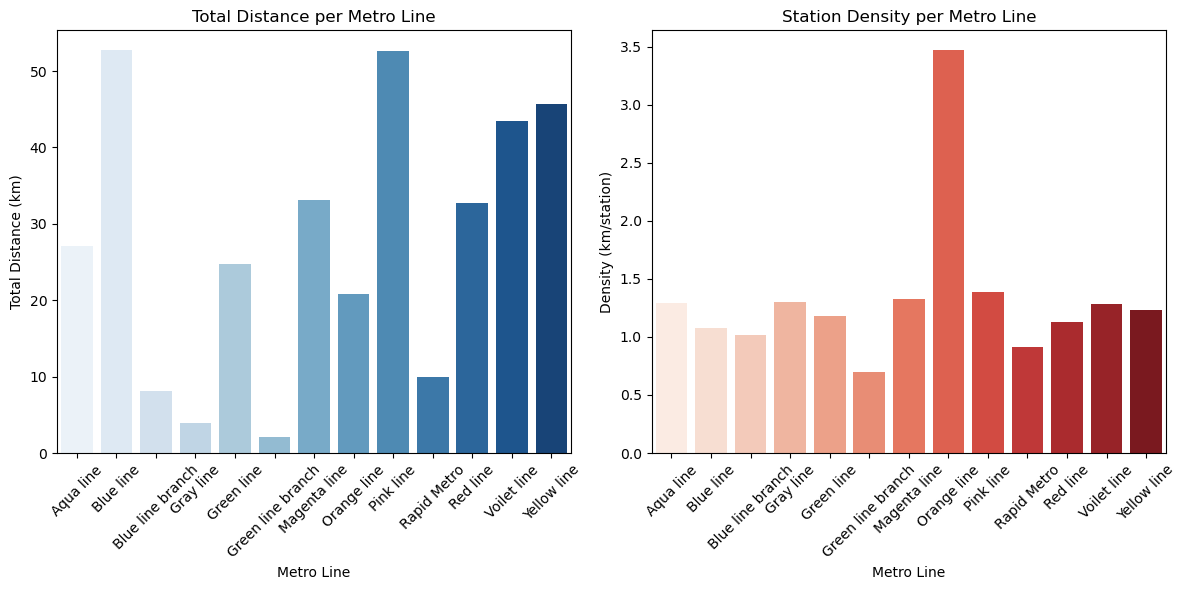

In [33]:
# Calculate total distance and station density
total_distance_per_line = metro_data.groupby('Line')['Distance from Start (km)'].max()
stations_per_line = metro_data['Line'].value_counts()
station_density = total_distance_per_line / stations_per_line

# Create a DataFrame for visualization
line_analysis = pd.DataFrame({
    'Total Distance (km)': total_distance_per_line,
    'Station Density (km/station)': station_density
}).reset_index().rename(columns={'index': 'Line'})

# Plot: Total Distance vs Station Density
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for total distance
sns.barplot(data=line_analysis, x='Line', y='Total Distance (km)', ax=axes[0], palette='Blues')
axes[0].set_title("Total Distance per Metro Line", fontsize=12)
axes[0].set_xlabel("Metro Line")
axes[0].set_ylabel("Total Distance (km)")
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for station density
sns.barplot(data=line_analysis, x='Line', y='Station Density (km/station)', ax=axes[1], palette='Reds')
axes[1].set_title("Station Density per Metro Line", fontsize=12)
axes[1].set_xlabel("Metro Line")
axes[1].set_ylabel("Density (km/station)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
